In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import myML

In [ ]:
def Test_1D(X):
    y = (X*6-2)**2*np.sin(X*12-4)
    return y

# Initial training
X_train = np.array([0.0, 0.5, 1], ndmin=2)
y_train = Test_1D(X_train)

# Testing data
X_test = np.linspace(0.0, 1, 200).reshape(1,-1)
y_test = Test_1D(X_test)

model = myML.GaussianProcess(kernel='gaussian')

In [ ]:
RMSE = []

fig = plt.figure(figsize=(16,6))
ax = plt.axes()

for n_points in range(1,30):
    ax.clear()
    ax.set_ylim(-10,17)

    model.fit(X_train, y_train, iters=500)
    y_pred, yvar_pred = model.predict(X_test)
    RMSE.append(model.score(X_test, y_test))

    #Original function
    ax.plot(X_test[0,:],y_test[0,:], linewidth=3, linestyle='--', color='red', label='Test function')
    ax.scatter(X_train[0,:],y_train[0,:], linewidth=6, color='red', label='Training points')
    #Prediction + confidence intervals
    ax.plot(X_test[0,:],y_pred[0,:], linewidth=2, color='blue', label='Gaussian process prediction')
    ax.fill_between(X_test[0,:],y_pred[0,:]-1.96*yvar_pred[0,:],y_pred[0,:]+1.96*yvar_pred[0,:], color='blue', alpha=0.1, label='95% CI')

    ax.legend(loc='upper left', prop={'size': 14})
    plt.savefig('imgs/img{:05d}'.format(n_points), dpi=100)

    newvalue = np.array([[X_test[0,np.argmax(yvar_pred[0,:])]]])
    X_train = np.append(X_train, newvalue, axis=1)
    y_train = np.append(y_train, Test_1D(newvalue), axis=1)

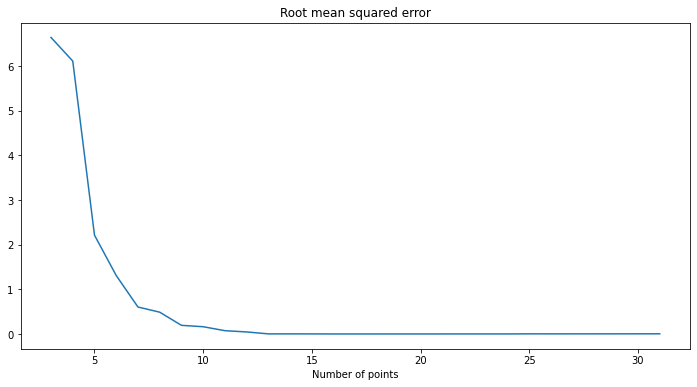

In [9]:
fig = plt.figure(figsize=(12,6))
plt.plot(list(range(3,32)),RMSE)
plt.xlabel('Number of points')
plt.title('Root mean squared error')
plt.savefig('imgs/RMSE')